# 最齐全的colab EDA版本

In [38]:
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
# os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [39]:
def colab_download(proj_name,is_kaggle):
    import requests
    from tqdm import tqdm

    if is_kaggle:
        import sys
        sys.path.append("/kaggle/working/")

    project_name=proj_name

    url = f'http://kuroweb.tk:8000/api/v1/pack/wyftp/dataset/{project_name}.tar.gz'
    user, password = 'wuying', '123aaa'
    response = requests.get(url, stream=True,auth=(user, password))
    total_size_in_bytes= int(response.headers.get('content-length', 0))
    block_size = 1024 #1 Kibibyte
    progress_bar = tqdm(total=total_size_in_bytes, unit='iB', unit_scale=True)
    with open('download.tar.gz', 'wb') as file:
        for data in response.iter_content(block_size):
            progress_bar.update(len(data))
            file.write(data)
    progress_bar.close()
    if total_size_in_bytes != 0 and progress_bar.n != total_size_in_bytes:
        print("ERROR, something went wrong")

    import tarfile

    # open file
    file = tarfile.open('download.tar.gz')
    # extracting file
    file.extractall('./')
    file.close()

    import shutil
    import os

    source_dir = f'./{project_name}'
    target_dir = './'

    file_names = os.listdir(source_dir)

    for file_name in file_names:
        try:
            shutil.move(os.path.join(source_dir, file_name), target_dir)
        except Exception as e:
            print(e,'at',file_name)


In [4]:
def colab_upload(single_file_or_directory):
    import requests
    import os

    if os.path.exists(single_file_or_directory):
        if os.path.isdir(single_file_or_directory):
            files = [single_file_or_directory + '/' + f for f in os.listdir(single_file_or_directory)]
            for file in files:
                colab_upload(file)
        else:
            # files = [single_file_or_directory]

            url=f'http://kuroweb.tk:8000/api/v1/fs/wyftp/dataset/{single_file_or_directory}'
            print('uploading',single_file_or_directory)
            r = requests.put(url, data=open(single_file_or_directory, 'rb'), auth=('wuying', '123aaa'))
            print(r)
colab_upload('bb.py')

uploading bb.py
<Response [200]>


In [41]:
# colab_download('model',True)

In [42]:
# 上免那个不起作用

# !pip install -r requirements.txt

# curve analyze

D:\miniconda\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)]


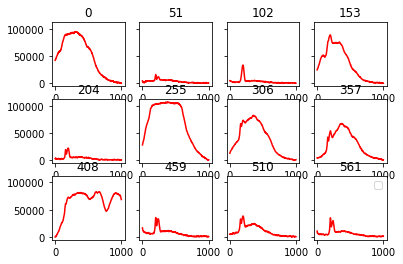

In [43]:
from tool import wine_data_loader

import numpy as np
import matplotlib.pyplot as plt

data = np.zeros(0, dtype=np.int)
tags = []

x, y = wine_data_loader.get_data3()

for i in range(15):
    data = np.append(data, x[i * 51, :])
    tags.append(i * 51)

data = data.reshape(15, -1)

f, *subs16 = plt.subplots(3, 4, sharey=True)
print(subs16)
subs16 = subs16[0]

for show_what in range(12):
    row = show_what // 4
    col = show_what % 4
    # subs16[row][col].plot([i for i in range(len(tru[:, show_what]))], pre[:, show_what], 'b,')
    # subs16[row][col].plot([i for i in range(len(tru[:, show_what]))], np.average(pre,axis=1), 'g,')
    # subs16[row][col].plot([i for i in range(len(tru[:, show_what]))], tru[:, show_what], 'r,')
    # print(data[show_what].shape)
    subs16[row][col].plot(range(len(data[show_what])), data[show_what, :], 'r-')
    subs16[row][col].title.set_text(str(tags[show_what]))
plt.legend(loc="upper right")
plt.show()

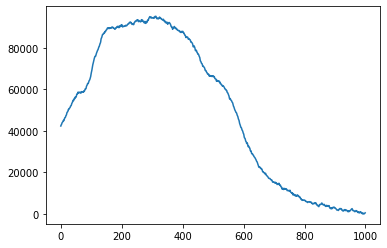

In [75]:
plt.plot(data[0])
plt.show()

In [44]:
import json

import numpy as np
import seaborn as sns

# record start time
import pandas as pd
import torch
from IPython.core.display import display
from keras import layers
# residual block
# https://stackoverflow.com/questions/64792460/how-to-code-a-residual-block-using-two-layers-of-a-basic-cnn-algorithm-built-wit
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

from general_model.grow_numpy import GrowableNumpyArray
from general_model.list_batch_loader import ListBatchLoadDataset
from model_helper.single_gpu_dataloader import SingleGpuTensorWrapper
from pytorch_regression.regression_params import RegressionParams
from tool import ml, wine_tool, data_loader, wine_data_loader
from tool.dbg import dbg

In [45]:
if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


No GPU found
Num GPUs Available:  0


酒精


D:\miniconda\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
D:\miniconda\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


{'name': '#1', 'degree': 70.5}
{'name': '#2', 'degree': 62.04}
{'name': '#3', 'degree': 55.84}
{'name': '#4', 'degree': 50.25}
{'name': '#5', 'degree': 45.23}
{'name': '#6', 'degree': 37.99}
{'name': '#7', 'degree': 30.39}
{'name': '#8', 'degree': 21.27}
{'name': '#9', 'degree': 12.76}
{'name': '#10', 'degree': 7.66}
{'name': '#11', 'degree': 1.53}
国之娇子
{'name': '#1', 'degree': 50.88}
{'name': '#2', 'degree': 47.83}
{'name': '#3', 'degree': 44.96}
{'name': '#4', 'degree': 41.36}
{'name': '#5', 'degree': 37.22}
{'name': '#6', 'degree': 33.5}
{'name': '#7', 'degree': 26.8}
{'name': '#8', 'degree': 19.3}
{'name': '#9', 'degree': 11.58}
{'name': '#10', 'degree': 6.95}
北京二锅头
威海卫烧锅
丁香情
原浆
北大仓
苦芥
五粮情
not exists: data4/#13
景芝白干
衡水老白干
老酒壶
牛栏山陈酿
杜二酒
小郎酒
闷倒驴
not exists: data4/#14
牛栏山二锅头
not exists: data4/#15


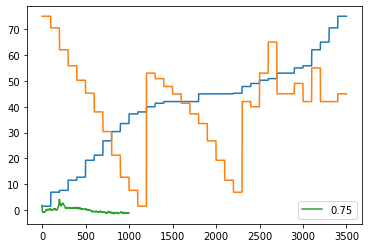

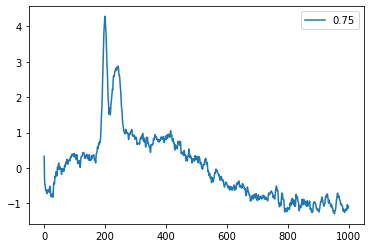

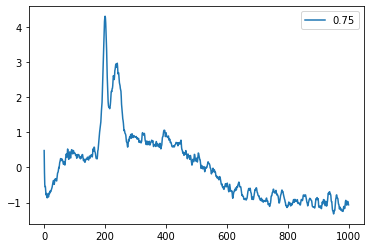

(2100, 1000) (2100,)


In [46]:
wine_json = ml.read_json("Wine.json")


class RegressionTrainer:
    def __init__(self):
        self.param = RegressionParams()
        self.param.batch_size = 64
        self.param.epoch = 1
        self.param.lr = 1e-9
        self.param.cnn_stride = 1
        self.param.cnn_size = 3
        self.param.pool_size = 2
        self.param.lr_decay = 0.99

    def load(self):

        self.x = GrowableNumpyArray(dtype=np.float, grow_speed=16)
        self.y = GrowableNumpyArray(dtype=np.float, grow_speed=16)

        for wine in wine_json:
            base_wine_path = 'data4/' + wine['id']
            dbg(wine['name'])
            if not os.path.exists(base_wine_path):
                dbg('not exists:', base_wine_path)
                continue
            # load data
            dirs = ml.getAllFiles(f'{base_wine_path}')
            for d in dirs:
                path = d
                files = ml.getAllFileRecursively(path)
                for f in files:
                    self.x.update(wine_tool.col2data_to_float_list(f))
                    self.y.add(wine['degree'])
                    # self.x = np.append(self.x, wine_tool.col2data_to_float_list(f))
                    # self.y = np.append(self.y, wine['degree'])

            # load item_data
            for wine_item in wine['items']:
                sub_wine_path = base_wine_path + '_' + wine_item['name']

                dirs = ml.getAllFiles(f'{sub_wine_path}')
                dbg(wine_item)
                for d in dirs:
                    path = d
                    files = ml.getAllFileRecursively(path)
                    for f in files[:100]:
                        self.x.update(wine_tool.col2data_to_float_list(f))
                        self.y.add(wine_item['degree'])
                        # self.x = np.append(self.x, wine_tool.col2data_to_float_list(f))
                        # self.y = np.append(self.y, wine_item['degree'])

        self.x = self.x.finalize()
        self.x = self.x.reshape((-1, 1000))

        self.y = self.y.finalize()

        plt.plot(sorted(self.y))
        plt.plot(self.y)

        # normalize

        self.y = self.y / 100

        layer_normed_x = torch.nn.LayerNorm([1000])(torch.tensor(self.x, dtype=torch.float))
        i = 0
        while i < 3:
            indice = i
            plt.plot(layer_normed_x[indice].detach().numpy(), label=self.y[indice])
            plt.legend()
            plt.show()
            i += 1

        self.x, self.y, self.x1, self.y1 = wine_data_loader.split(self.x, self.y, 1 - self.param.train_test_split)

        # wine_dataset = ListBatchLoadDataset(self.x.tensor, self.y.tensor)
        # self.dataloader = DataLoader(wine_dataset, batch_size=self.param.batch_size,
        #                         shuffle=True, num_workers=0)


trainer = RegressionTrainer()
trainer.load()
dbg(trainer.x.shape, trainer.y.shape)

# EDA

In [47]:
trainer.y.shape

(2100,)

D:\miniconda\envs\tf_gpu\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

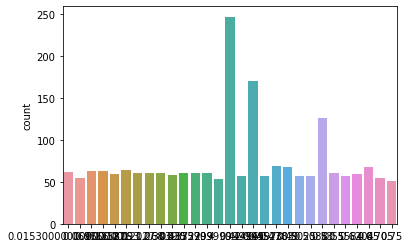

In [48]:
sns.countplot(trainer.y)

In [49]:
np.max(trainer.x,axis=1).shape

(2100,)

In [50]:
np.max(trainer.x,axis=1)

array([16127., 31044., 14653., ..., 18333., 96246., 31665.])

D:\miniconda\envs\tf_gpu\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

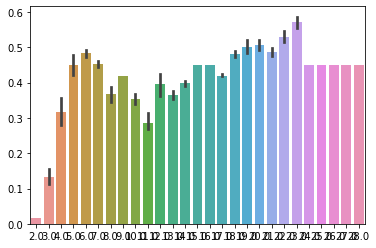

In [51]:
# 峰值
sns.barplot(np.max(trainer.x,axis=1)//4000,trainer.y)

D:\miniconda\envs\tf_gpu\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

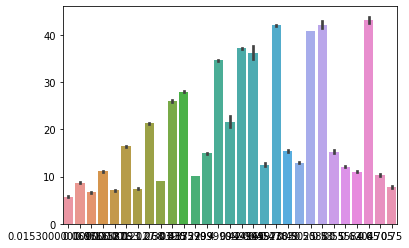

In [52]:
# y对峰值
sns.barplot(trainer.y,np.max(trainer.x,axis=1)//2000)

D:\miniconda\envs\tf_gpu\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

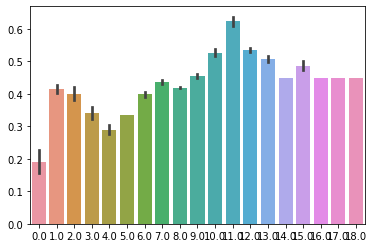

In [53]:
sns.barplot(np.average(trainer.x,axis=1)//4000,trainer.y)

D:\miniconda\envs\tf_gpu\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


array([2, 4, 0, ..., 0, 4, 4], dtype=int32)

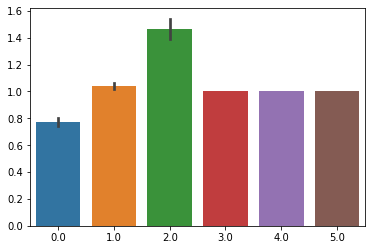

In [54]:
sns.barplot(trainer.x[:,0]//10000,(trainer.y*100).astype(int)//30)
(trainer.y*100).astype(int)//10

In [55]:
pd_numpy=np.append(trainer.x,trainer.y.reshape(-1,1),axis=1)
pd_numpy

array([[4.8350e+03, 4.6630e+03, 4.4710e+03, ..., 7.0310e+03, 7.3090e+03,
        2.1270e-01],
       [5.3960e+03, 5.3190e+03, 5.2880e+03, ..., 1.2640e+03, 1.4330e+03,
        4.0000e-01],
       [5.1790e+03, 5.2630e+03, 5.4970e+03, ..., 2.2000e+03, 2.2730e+03,
        7.6600e-02],
       ...,
       [3.8270e+03, 3.7110e+03, 3.3940e+03, ..., 1.2810e+03, 9.9900e+02,
        6.9500e-02],
       [0.0000e+00, 1.3900e+02, 2.9400e+02, ..., 5.9846e+04, 5.9088e+04,
        4.5000e-01],
       [6.1680e+03, 4.8990e+03, 4.6340e+03, ..., 5.7700e+02, 7.0300e+02,
        4.9000e-01]])

In [56]:
pd_numpy.shape

(2100, 1001)

In [57]:
df = pd.DataFrame(pd_numpy, columns = [i+1 for i in range(1001)])

In [58]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,992,993,994,995,996,997,998,999,1000,1001
0,4835.0,4663.0,4471.0,4699.0,5082.0,5127.0,4926.0,5149.0,4901.0,4656.0,...,7523.0,7510.0,7453.0,7454.0,7490.0,7360.0,7050.0,7031.0,7309.0,0.2127
1,5396.0,5319.0,5288.0,5389.0,5280.0,5094.0,4957.0,4974.0,5033.0,5019.0,...,598.0,517.0,266.0,356.0,661.0,987.0,986.0,1264.0,1433.0,0.4000
2,5179.0,5263.0,5497.0,5615.0,5764.0,5587.0,5436.0,5707.0,5829.0,5475.0,...,1664.0,1870.0,1728.0,1696.0,1991.0,2205.0,2243.0,2200.0,2273.0,0.0766
3,5326.0,5719.0,6277.0,6566.0,6466.0,6547.0,6636.0,6512.0,6285.0,6152.0,...,12.0,198.0,160.0,472.0,1008.0,1275.0,1224.0,1190.0,1341.0,0.1930
4,3427.0,3386.0,3235.0,3381.0,4009.0,4328.0,3904.0,3618.0,4050.0,4366.0,...,3383.0,3452.0,3415.0,3306.0,3174.0,3304.0,3419.0,3198.0,2863.0,0.1276


In [59]:
corr_result=df.corr()[1001].abs().sort_values(ascending=False)
corr_result

1001    1.000000
160     0.422531
161     0.422425
159     0.421976
162     0.421866
          ...   
996     0.050435
999     0.050401
998     0.049765
997     0.048982
1000    0.048837
Name: 1001, Length: 1001, dtype: float64

In [60]:
type(corr_result)

pandas.core.series.Series

In [61]:
corr_result.index,corr_result.values

(Int64Index([1001,  160,  161,  159,  162,  163,  158,  201,  200,  202,
             ...
              989,  992,  994,  993,  995,  996,  999,  998,  997, 1000],
            dtype='int64', length=1001),
 array([1.        , 0.42253099, 0.42242539, ..., 0.04976478, 0.04898183,
        0.04883684]))

In [62]:
type(corr_result.index)

pandas.core.indexes.numeric.Int64Index

In [63]:
index_with_weights=zip(corr_result.index[1:],corr_result.values[1:])
index_with_weights

In [64]:
sorted_index_with_weights=sorted(index_with_weights,key=lambda x:x[0])
# sorted_index_with_weights

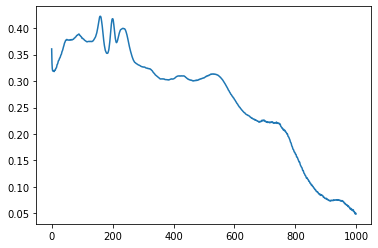

In [65]:
plt.plot(range(1000),[i[1] for i in sorted_index_with_weights])
plt.show()

In [66]:
trainer.x.shape,trainer.y.shape

((2100, 1000), (2100,))

In [67]:
tf.debugging.set_log_device_placement(False)

多层Dense模型

In [68]:

# act = 'tanh'
# # inp = __next = layers.Input(shape=[1280 * 720*10], name='input')
# inp = __next = layers.Input(shape=[1000], name='input')
# __next = layers.Dense(800, activation=act)(__next)
# __next = layers.Dense(800, activation=act)(__next)
# __next = layers.Dense(800, activation=act)(__next)
# __next = layers.Dense(104, activation=act)(__next)
# __next = layers.Dense(10, activation=act)(__next)
# output = __next = layers.Dense(1, )(__next)
# model = keras.Model(inputs=[inp], outputs=[output])
# model.summary()
# # opt = tf.keras.optimizers.Adam(lr=1e-4)
# opt = tf.keras.optimizers.Adam(lr=1e-6)
# model.compile(
#     optimizer=opt,
#     # optimizer='adam',
#     loss='mse',
# )

In [69]:
# act = 'tanh'
# config = [
#     ('conv', 2, 3),
#     ('pool', 2),
#     ('activation',act),
#     ('conv', 2, 3),
#     ('pool', 2),
#     ('activation',act),
#
#     ('conv', 16, 3),
#     ('pool', 2),
#     ('activation',act),
#
#     ("conv", 16, 3),
#     ('pool', 2),
#     ('activation',act),
#
#     ("conv", 64, 3),
#     ('pool', 2),
#     ('activation',act),
#
#     ("conv", 64, 3),
#     ('pool', 2),
#     ('activation',act),
#
# ]
# # inp = __next = layers.Input(shape=[1280 * 720*10], name='input')
# inp = __next = layers.Input(shape=[1000], name='input')
# __next = layers.Reshape(target_shape=[1000, 1], name='reshape')(__next)
#
# for c in config:
#     if c[0] == 'conv':
#         __next = layers.Conv1D(filters=c[1], kernel_size=c[2])(__next)
#     elif c[0] == 'pool':
#         __next = layers.MaxPool1D(pool_size=c[1])(__next)
#     elif c[0] == 'activation':
#         __next = layers.Activation(c[1])(__next)
#
# __next = layers.Flatten()(__next)
# output = __next = layers.Dense(1, )(__next)
# model = keras.Model(inputs=[inp], outputs=[output])
# model.summary()
# # opt = tf.keras.optimizers.Adam(lr=1e-4)
# opt = tf.keras.optimizers.Adam(lr=1e-6)
# model.compile(
#     optimizer=opt,
#     # optimizer='adam',
#     loss='mse',
# )

In [70]:
act = 'tanh'
config = [
    ('conv', 2, 3),
    ('pool', 2),
    ('activation',act),
    ('conv', 2, 3),
    ('pool', 2),
    ('activation',act),

    ('conv', 16, 3),
    ('pool', 2),
    ('activation',act),

    ("conv", 16, 3),
    ('pool', 2),
    ('activation',act),

    ("conv", 64, 3),
    ('pool', 2),
    ('activation',act),

    ("conv", 64, 3),
    ('pool', 2),
    ('activation',act),

]
# inp = __next = layers.Input(shape=[1280 * 720*10], name='input')
inp = __next = layers.Input(shape=[1000], name='input')
__next = layers.Reshape(target_shape=[1000, 1], name='reshape')(__next)


__next = layers.Flatten()(__next)
output = __next = layers.Dense(1, )(__next)
model = keras.Model(inputs=[inp], outputs=[output])
model.summary()
# opt = tf.keras.optimizers.Adam(lr=1e-4)
opt = tf.keras.optimizers.Adam(lr=1e-6)
model.compile(
    optimizer=opt,
    # optimizer='adam',
    loss='mse',
)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 1000)]            0         
                                                                 
 reshape (Reshape)           (None, 1000, 1)           0         
                                                                 
 flatten_1 (Flatten)         (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 1,001
Trainable params: 1,001
Non-trainable params: 0
_________________________________________________________________


D:\miniconda\envs\tf_gpu\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [71]:
history = model.fit(trainer.x, trainer.y,
                    # validation_data=(X_test, Y_test)
                    # epochs=50,
                    # epochs=100,
                    epochs=1,
                    # epochs=300,
                    )

66/66 [==============================] - 0s 1ms/step - loss: 1514276864.0000


In [72]:
history.history

{'loss': [1514276864.0]}

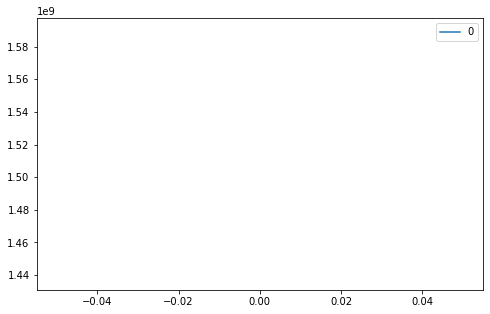

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
predict,-14607.537109,-7011.375977,-3517.838623,-3498.419922,-26905.375,-38778.40625,-34814.261719,-19057.757812,-78769.59375,-10211.600586,-37192.683594,-3201.520508,-17539.777344,-5143.818359,-8682.732422
truth,0.705000,0.379900,0.076600,0.127600,0.268,0.37220,0.335000,0.420000,0.45000,0.452300,0.450000,0.015300,0.420000,0.303900,0.069500
diff,-14608.242109,-7011.755877,-3517.915223,-3498.547522,-26905.643,-38778.77845,-34814.596719,-19058.177812,-78770.04375,-10212.052886,-37193.133594,-3201.535808,-17540.197344,-5144.122259,-8682.801922


In [73]:
start_indice=0
pd.DataFrame(history.history['loss'][start_indice:]).plot(figsize=(8, 5))
# plt.grid(True)
# plt.gca().set_ylim(0, 5e-4)
plt.show()


prediction = model.predict(trainer.x1)
dict = {'predict': prediction[:15, 0],
        'truth': trainer.y1[:15],
        'diff': (prediction[:15, 0] - trainer.y1[:15])
        }
df = pd.DataFrame(dict)

# displaying the DataFrame
display(df.T)


In [74]:
# 输出误差小于2.5度的百分比
dif = prediction.reshape(-1, ) - trainer.y1

np.sum((np.abs(dif) < 0.025)) / len(dif) * 100

0.0